## Imports and Setup

In [ ]:
#!apt-get update && apt-get install -y --no-install-recommends gdal-bin

In [1]:
import os 
os.chdir('../')
from utils import data_download
from utils import data_utils
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

%load_ext autoreload
%autoreload 2

## Parameters

In [4]:
iso_code = "BDI"
adm_level = "ADM3"
acled_start_date = "2021-01-01"
acled_config_file = "configs/acled_credentials.yaml"

## Download Datasets

In [5]:
acled_config = data_utils.read_config(acled_config_file)
acled = data_download.download_acled(
    iso_code, acled_config["ACLED_key"], acled_config["ACLED_email"], start_date=acled_start_date
)
acled.head(2)

INFO:root:Downloading ACLED data for BDI...
INFO:root:Reading ACLED page 1...
INFO:root:Reading ACLED page 2...
INFO:root:acled file saved to C:\Users\Isabelle\Documents\GFDRR\dfcv\colocation-mapping\data\BDI\BDI_ACLED.geojson.
INFO:pyogrio._io:Created 1,952 records


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_1km,population_2km,population_5km,population_best,geometry
0,BUR12102,2025-07-02,2025,1,Political violence,Violence against civilians,Attack,CNDD-FDD-Imbonerakure: National Council for th...,,Political militia,Civilians (Burundi),,Civilians,Political militia-Civilians,Civilian targeting,108,Eastern Africa,Burundi,Bujumbura Rural,Nyabiraba,Nyabiraba,Nyabiraba,-3.4673,29.4770,2,Radio Publique Africaine,National,"On 2 July 2025, a group of Imbonerakure severe...",0,,1752550304,701,2874,4578,2874.0,POINT (29.477 -3.4673)
1,BUR12095,2025-06-30,2025,1,Political violence,Violence against civilians,Attack,CNDD-FDD-Imbonerakure: National Council for th...,,Political militia,Civilians (Burundi),,Civilians,Political militia-Civilians,Civilian targeting,108,Eastern Africa,Burundi,Bujumbura Rural,Nyabiraba,Nyabibondo,Nyabibondo,-3.4417,29.4883,2,Radio Publique Africaine; SOS Medias,New media-National,"On 30 June 2025, Imbonerakure killed 6 persons...",6,,1751941680,2079,8154,7913,7913.0,POINT (29.4883 -3.4417)


In [8]:
data = data_download.generate_datasets(iso_code, adm_level=adm_level)
data.sort_values("dfcv_conflict_exposure_relative", ascending=False).head(3)

,iso_code,ADM3,ADM3_ID,worldpop,earthquake,earthquake_exposure,landslide,landslide_exposure,cyclone,cyclone_exposure,tsunami_rp100,tsunami_rp100_exposure,extreme_heat_rp100,extreme_heat_rp100_exposure,wildfire_rp10,wildfire_rp10_exposure,geometry,population_best,conflict_count,null_conflict_count,conflict_exposure,dfcv_conflict_exposure,earthquake_exposure_relative,landslide_exposure_relative,cyclone_exposure_relative,tsunami_rp100_exposure_relative,extreme_heat_rp100_exposure_relative,wildfire_rp10_exposure_relative,conflict_exposure_relative,dfcv_conflict_exposure_relative,mhs_exposure_relative,mhs_dfcv_conflict_exposure_relative,mhs_exposure,mhs_dfcv_conflict_exposure
1307,BDI,Muremera,37066493B48753248581236,2526.748047,0.129469,0.0,3.000000,2004.492065,0.012624,0.0,0,0.0,35.432434,0.0,69.132164,2526.748047,"POLYGON ((29.83421 -2.83406, 29.83437 -2.83393...",12798.0,1.0,NaN,12798.0,2526.748047,0.0,0.793309,0.0,0.0,0.0,1.0,5.065008,1.0,0.264436,0.264436,668.164022,1.688282e+06
1131,BDI,Kibayi,37066493B71820760488804,3922.789062,0.154302,0.0,2.285714,1238.952393,0.012624,0.0,0,0.0,34.349487,0.0,69.132164,3922.789062,"POLYGON ((29.712 -2.96246, 29.71322 -2.96071, ...",NaN,NaN,NaN,NaN,3922.789062,0.0,0.315835,0.0,0.0,0.0,1.0,NaN,1.0,0.105278,0.105278,412.984131,1.620050e+06
1141,BDI,Mugongo,37066493B64415824871212,2763.694824,0.171526,0.0,3.714286,2763.694824,0.011047,0.0,0,0.0,33.662796,0.0,61.606796,2763.694824,"POLYGON ((29.54733 -2.89012, 29.548 -2.88989, ...",NaN,NaN,NaN,NaN,2763.694824,0.0,1.000000,0.0,0.0,0.0,1.0,NaN,1.0,0.333333,0.333333,921.231608,2.546003e+06


## Visualize Data

<Axes: >

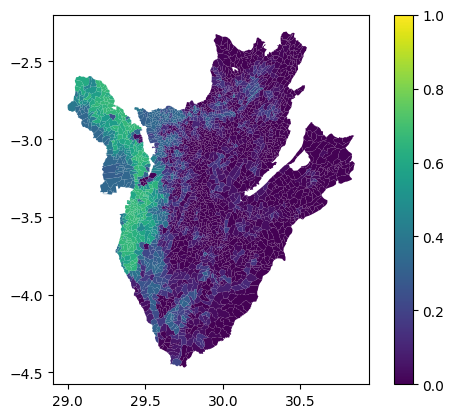

In [14]:
data.plot("mhs_dfcv_conflict_exposure_relative", legend=True, vmin=0, vmax=1)